# SHACL for CGMES using pyshacl

In [1]:
from rdflib import Graph
from pyshacl import validate
from glob import glob
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from rdfpandas.graph import to_dataframe
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
from SHACL_utils import *

## Simple Example

In [3]:
# Person Example
persons_data_graph = parse_folder_to_single_graph("datasets\example_person\data", "rdf")
persons_shapes_graph = parse_folder_to_single_graph("datasets\example_person\shapes", "rdf")

Parsing 1 rdf files
Parsing datasets\example_person\data\persons.rdf
Parsing 1 rdf files
Parsing datasets\example_person\shapes\person_shapes.rdf


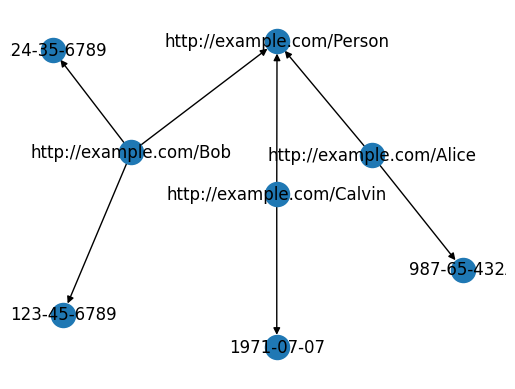

In [4]:
plot_graph(persons_data_graph)

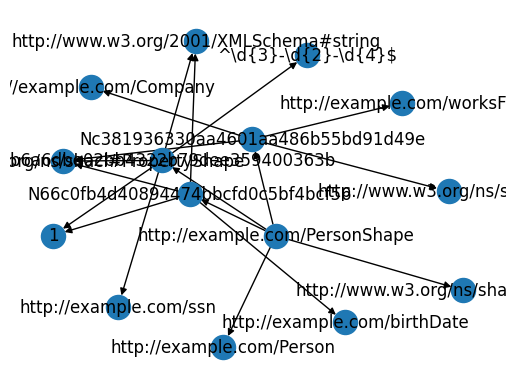

In [5]:
plot_graph(persons_shapes_graph)

In [6]:
persons_data_df = to_dataframe(persons_data_graph)
persons_data_df

,ex:ssn{Literal}[0],ex:ssn{Literal}[1],rdf:type{URIRef},ex:birthDate{Literal}(xsd:date)
ex:Alice,987-65-432A,NaN,ex:Person,NaN
ex:Bob,123-45-6789,124-35-6789,ex:Person,NaN
ex:Calvin,NaN,NaN,ex:Person,1971-07-07


In [7]:
persons_shapes_df = to_dataframe(persons_shapes_graph)
persons_shapes_df

,rdf:type{URIRef},sh:class{URIRef},sh:nodeKind{URIRef},sh:path{URIRef},sh:datatype{URIRef},sh:maxCount{Literal}(xsd:integer),sh:pattern{Literal},sh:property{BNode}[0],sh:property{BNode}[1],sh:property{BNode}[2],sh:targetClass{URIRef}
N5b6a6dbe02bb4322b79dee359400363b,sh:PropertyShape,NaN,NaN,ex:ssn,xsd:string,1,^\d{3}-\d{2}-\d{4}$,NaN,NaN,NaN,NaN
N66c0fb4d40894474bbcfd0c5bf4bcf56,sh:PropertyShape,NaN,NaN,ex:birthDate,xsd:string,1,NaN,NaN,NaN,NaN,NaN
Nc381936330aa4601aa486b55bd91d49e,sh:PropertyShape,ex:Company,sh:IRI,ex:worksFor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ex:PersonShape,sh:NodeShape,NaN,NaN,NaN,NaN,NaN,NaN,N5b6a6dbe02bb4322b79dee359400363b,N66c0fb4d40894474bbcfd0c5bf4bcf56,Nc381936330aa4601aa486b55bd91d49e,ex:Person


Search shapes for one attribute by using a keyword search:

In [8]:
# Search social security number and drop NaN columns
data = search_df_word(dataframe=persons_shapes_df, keyword="ssn")
data = drop_nan_cols(data)
print(f"{data.shape}")
data

(1, 5)


,rdf:type{URIRef},sh:path{URIRef},sh:datatype{URIRef},sh:maxCount{Literal}(xsd:integer),sh:pattern{Literal}
N5b6a6dbe02bb4322b79dee359400363b,sh:PropertyShape,ex:ssn,xsd:string,1,^\d{3}-\d{2}-\d{4}$


In [9]:
r = validate(data_graph=persons_data_graph, shacl_graph=persons_shapes_graph)
person_conforms, person_results_graph, person_results_text = r
print(person_results_text)

Validation Report
Conforms: False
Results (3):
Constraint Violation in PatternConstraintComponent (http://www.w3.org/ns/shacl#PatternConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ rdf:type sh:PropertyShape ; sh:datatype xsd:string ; sh:maxCount Literal("1", datatype=xsd:integer) ; sh:path ex:ssn ; sh:pattern Literal("^\d{3}-\d{2}-\d{4}$") ]
	Focus Node: ex:Alice
	Value Node: Literal("987-65-432A")
	Result Path: ex:ssn
	Message: Value does not match pattern '^\d{3}-\d{2}-\d{4}$'
Constraint Violation in MaxCountConstraintComponent (http://www.w3.org/ns/shacl#MaxCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ rdf:type sh:PropertyShape ; sh:datatype xsd:string ; sh:maxCount Literal("1", datatype=xsd:integer) ; sh:path ex:ssn ; sh:pattern Literal("^\d{3}-\d{2}-\d{4}$") ]
	Focus Node: ex:Bob
	Result Path: ex:ssn
	Message: More than 1 values on ex:Bob->ex:ssn
Constraint Violation in DatatypeConstraintComponent (http://www.w3.org/ns/shacl#DatatypeConstraintC

### Explanation (w3.org) 
1. Severity:
    The value is equal to the value of sh:severity of the shape in the shapes graph that caused the result, defaulting to sh:Violation if no sh:severity has been specified for the shape.

1. Source Shape: 		
Validation results may include, as the only value of the property sh:sourceShape, the shape that the given sh:focusNode was validated against.


1. Focus Node:
Each validation result has exactly one value for the property sh:focusNode that is equal to the focus node that has caused the result. This is the focus node that was validated when the validation result was produced.

1. Value Node
    * For node shapes the value nodes are the individual focus nodes, forming a set with exactly one member.
    * For property shapes with a value for sh:path p the value nodes are the set of nodes in the data graph that can be reached from the focus node with the path mapping of p. Unless stated otherwise, the value of sh:resultPath of each validation result is a SHACL property path that represents an equivalent path to the one provided in the shape.


1. Result Path:
Validation results may have a value for the property sh:resultPath pointing at a well-formed SHACL property path. For results produced by a property shape, this SHACL property path is equivalent to the value of sh:path of the shape, unless stated otherwise.


1. Message:
Validation results may have values for the property sh:resultMessage, for example to communicate additional textual details to humans. While sh:resultMessage may have multiple values, there should not be two values with the same language tag. These values are produced by a validation engine based on the values of sh:message of the constraints in the shapes graph, see Declaring Messages for a Shape. In cases where a constraint does not have any values for sh:message in the shapes graph the SHACL processor may automatically generate other values for sh:resultMessage.


## CGMES Example

First load the data. Show the table in OneNote.

In [11]:
# Load data
repo_path = os.path.abspath('').split('sandbox')[0]
cgmes_data_graph = parse_folder_to_single_graph("datasets\cgmes_threedotzero", "xml")
cgmes_shapes_graph = parse_folder_to_single_graph(os.path.join(repo_path, "SHACL"), "rdf")

cgmes_conforms, cgmes_results_graph, cgmes_results_text = validate(data_graph=cgmes_data_graph, shacl_graph=cgmes_shapes_graph)

cgmes_data_df = to_dataframe(cgmes_data_graph)
cgmes_shapes_df = to_dataframe(cgmes_shapes_graph)
cgmes_results_df = to_dataframe(cgmes_results_graph)

Parsing 1 xml files
Parsing datasets\cgmes_threedotzero\Texel_EQ.xml
Parsing 75 rdf files
Parsing c:\dev\pycgmes\SHACL\Common\IdentifiedObjecStringLength.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\DL_453_cp_explicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\DL_453_cp_implicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\DY_457_cp_explicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\DY_457_cp_implicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\GL_13_cp_explicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\GL_13_cp_implicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\OP_452_cp_explicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\OP_452_cp_implicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\SC_452_cp.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\SV_456_cp_explicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfileValueType\SV_456_cp_implicit.rdf
Parsing c:\dev\pycgmes\SHACL\CrossProfi

In [12]:
print(f"{cgmes_shapes_df.shape=}")
cgmes_shapes_df.head()

cgmes_shapes_df.shape=(14237, 465)


,rdf:type{URIRef},sh:description{Literal},sh:group{URIRef},sh:message{Literal}[0],sh:message{Literal}[1],sh:minExclusive{Literal}(xsd:float),sh:name{Literal},sh:order{Literal}(xsd:integer),sh:order{Literal}(xsd:decimal),sh:path{URIRef},...,sh:declare{BNode}[103],sh:declare{BNode}[104],sh:declare{BNode}[105],sh:declare{BNode}[106],sh:declare{BNode}[107],sh:maxInclusive{Literal}(xsd:float),sh:or{BNode},sh:targetNode{URIRef},sh:deactivated{Literal}(xsd:boolean),rdfs:subClassOf{URIRef}
N00197d084b04446a9859b3143e1a17a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N0020b79ebbe9445386d271fbf7a480e6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cim:MechanicalLoadDynamics.AsynchronousMachine...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N0023f06413e64c2a9fc54a93d2da477e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N0048f3481387403b8b5ef1d1a698d6a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N0067a853463845db9f35674e90c65999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3 types of severity:

In [13]:
cgmes_shapes_df["sh:severity{URIRef}"].value_counts()

sh:severity{URIRef}
sh:Violation    8658
sh:Warning        20
sh:Info            7
Name: count, dtype: int64

## Descriptions and Messages in CGMES SHACL shapes

After specifying a cim object and the shacl item, these cells will filter the shapes dataframe and display the distinct values and counts.

In [14]:
cim_objects = ["voltagelevel", "bay", "substation", "busbarsection"]
columns_dict = {"message": 'sh:message{Literal}[0]', 'description':'sh:description{Literal}'}

In [15]:
test_item = "description"
object = cim_objects[1]

data = search_df_word(dataframe=cgmes_shapes_df, keyword=object)
data = drop_nan_rows_with_keyword(data, test_item)
data = drop_nan_cols(data)
print(f"Looking at {test_item} for {object}:\nSize of dataframe is {data.shape}")
display(data.head())
value_counts = column_value_counts(data, columns_dict[test_item])
print(f"Unique {test_item}s for {object}:")
value_counts

Looking at description for bay:
Size of dataframe is (15, 13)


,rdf:type{URIRef},sh:description{Literal},sh:group{URIRef},sh:message{Literal}[0],sh:name{Literal},sh:order{Literal}(xsd:integer),sh:path{URIRef},sh:path{BNode},sh:severity{URIRef},sh:nodeKind{URIRef},sh:maxCount{Literal}(xsd:integer),sh:minCount{Literal}(xsd:integer),sh:in{BNode}
eq452:AuxiliaryEquipment-containment,sh:PropertyShape,"For AuxilaryEquipment (CurrentTransformer, Pot...",eq452:EQ452containment,The containment is either missing or it is not...,C:452:EQ:AuxilaryEquipment:containment,0,NaN,N46496e928e2f402e9379d503fb95f1e1,sh:Violation,NaN,1,1,Nee04e3c6776a418ea8a7971b5c6c211a
eq452:BusbarSection-containment,sh:PropertyShape,For BusbarSection the association Equipment.Eq...,eq452:EQ452containment,The containment is either missing or it is not...,C:452:EQ:BusbarSection:containment,7,NaN,Nbcf2fcd5bdc247089f6fa1558a861698,sh:Violation,NaN,1,1,Nec50c89b6c2241f9a3d885499e0dc933
eq452:Clamp-containment,sh:PropertyShape,For Clamp the association Equipment.EquipmentC...,eq452:EQ452containment,The containment is either missing or it is not...,C:452:EQ:Clamp:containment,15,NaN,Na74a642848d24b1ead20a93a090bf59c,sh:Violation,NaN,1,1,Nb63f1666457047fdabbd14c263112ed9
eq452:Cut-containment,sh:PropertyShape,For Cut the association Equipment.EquipmentCon...,eq452:EQ452containment,The containment is either missing or it is not...,C:452:EQ:Cut:containment,14,NaN,N40c22a4b2f9c4516827909a3a8d10639,sh:Violation,NaN,1,1,N7a80f36db46a404b92951238facf2f92
eq452:Disconnector-containment,sh:PropertyShape,For Disconnector the association Equipment.Equ...,eq452:EQ452containment,The containment is either missing or it is not...,C:452:EQ:Disconnector:containment,10,NaN,N590d18c5152d4b2e835792ef2555f858,sh:Violation,NaN,1,1,N8969a7b19e9c4f278f283a10d929408e


Unique descriptions for bay:


sh:description{Literal}
This constraint validates the cardinality of the association at the used direction.                                                                                                                                                                          2
This constraint validates the value type of the association at the used direction.                                                                                                                                                                           2
For AuxilaryEquipment (CurrentTransformer, PotentialTransformer, PostLineSensor, SurgeArrester, WaveTrap, FaultIndicator) the association Equipment.EquipmentContainer is required and shall point to EquipmentContainer of type Bay or Line.                1
For BusbarSection the association Equipment.EquipmentContainer is required and shall point to EquipmentContainer of type VoltageLevel or Bay (when a disconnector is splitting a busbar section in two).           

## Some Violations

This is how the report for the current CGMES file looks like.

Note that a violation is either a sh:Violation or a sh:Info.

In [16]:
print(cgmes_results_text)

Validation Report
Conforms: False
Results (22):
Validation Result in SPARQLConstraintComponent (http://www.w3.org/ns/shacl#SPARQLConstraintComponent):
	Severity: sh:Info
	Source Shape: all600:All-GENC4
	Focus Node: <http://iec.ch/TC57/CIM100#IDchecks>
	Value Node: <file:///c:/dev/pycgmes/sandbox/SHACL/datasets/cgmes_threedotzero/fromage>
	Result Path: rdf:type
	Source Constraint: all600:All-GENC4Sparql
	Message: Invalid syntax of ID (rdf:ID or rdf:about).
Validation Result in SPARQLConstraintComponent (http://www.w3.org/ns/shacl#SPARQLConstraintComponent):
	Severity: sh:Info
	Source Shape: all600:All-GENC4
	Focus Node: <http://iec.ch/TC57/CIM100#IDchecks>
	Value Node: <file:///c:/dev/pycgmes/sandbox/SHACL/datasets/cgmes_threedotzero/Texel_EQ.xml#_416289388>
	Result Path: rdf:type
	Source Constraint: all600:All-GENC4Sparql
	Message: Invalid syntax of ID (rdf:ID or rdf:about).
Validation Result in SPARQLConstraintComponent (http://www.w3.org/ns/shacl#SPARQLConstraintComponent):
	Severity